In [207]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards

In [208]:
# tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_fix.jsonl", orient='records', lines=True)
tlog = pd.read_json("../../../active-rlhf/outputs/results/dynarmlogs/bagofwords/expbow50_reprodtest.jsonl", orient='records', lines=True)

In [209]:
tmp = tlog

In [210]:
tmp = tlog.dropna(subset='golds')
#tmp = tmp.iloc[1078:]

In [211]:
tlog

,texts,rewards,golds,thresh,step,reuses
0,[Question: Write a persuasive business letter ...,"[-14.8125, 8.0625]","[0.0, 3.0]",0.000000,1,NaN
1,[Question: Published 04/24/2019 06:17:12 pm at...,"[-14.375, -11.8125]","[0.0, 0.0]",0.000000,1,NaN
2,[Question: Write a fictional story about a sea...,"[-14.6875, 2.546875]","[0.0, 2.0]",0.000000,1,NaN
3,[Question: Explain the contributions of Alexan...,"[-6.15625, -14.8125]","[1.0, 0.0]",0.000000,1,NaN
4,[Question: Did Braniff's bankruptcy lead to an...,"[2.125, -14.875]","[2.0, 0.0]",0.000000,1,NaN
...,...,...,...,...,...,...
37525,[Question: Explain the significance of the cha...,"[13.4375, 11.4375]",NaN,1.929688,1598,1.0
37526,[Question: Create a JavaScript function that w...,"[15.0, 2.296875]",NaN,1.929688,1598,1.0
37527,[Question: Did Vasco Da Gama's experiences and...,"[10.375, 7.6875]",NaN,1.929688,1598,4.0
37528,[Question: Create a step-by-step guide includi...,"[14.8125, 3.46875]",NaN,1.929688,1598,1.0


In [212]:
rat = 0
ngs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    ngs.append(row['golds'])
    if row['thresh']!=0 and ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
tmp['golds'] = ngs
print(rat/len(tmp))

0.08186013767209012


/tmp/ipykernel_463442/265282859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['golds'] = ngs


In [213]:
tot, corr = 0, 0
vals = []
for j in range(0, len(tmp), 50):
    # check heuristic accuracy
    for i, row in tmp.iloc[j:j+50].iterrows():
        # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
        if row['golds'][0]==row['golds'][1]:
            continue
        tot = tot+1
        corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    vals.append(corr/tot)

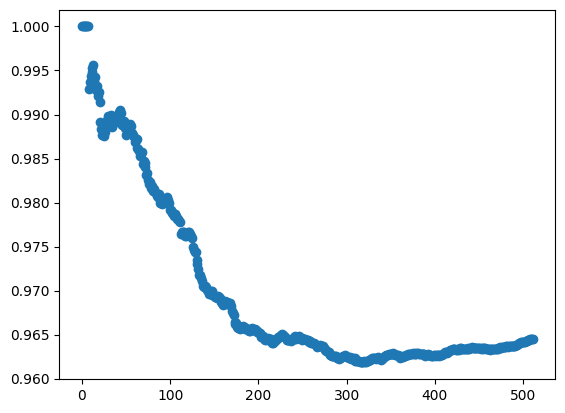

In [214]:
plt.scatter(range(len(vals)), vals)

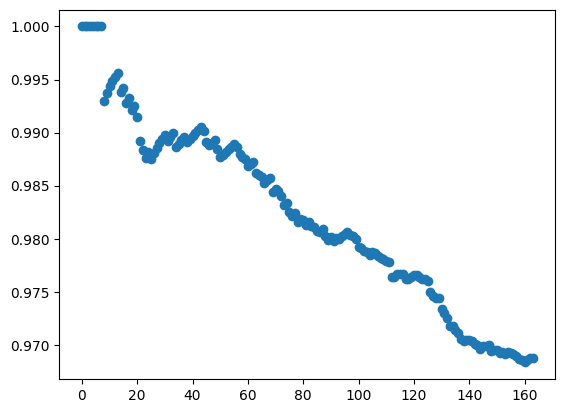

In [168]:
plt.scatter(range(len(vals)), vals)

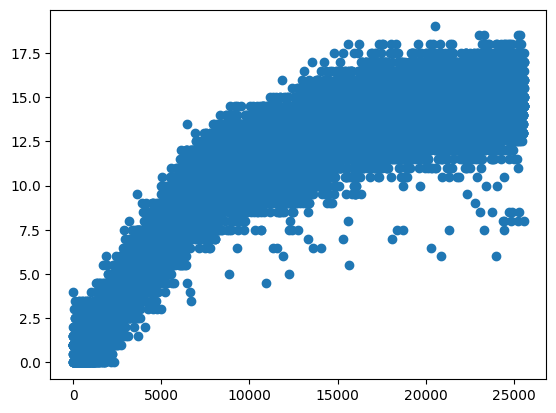

In [215]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)

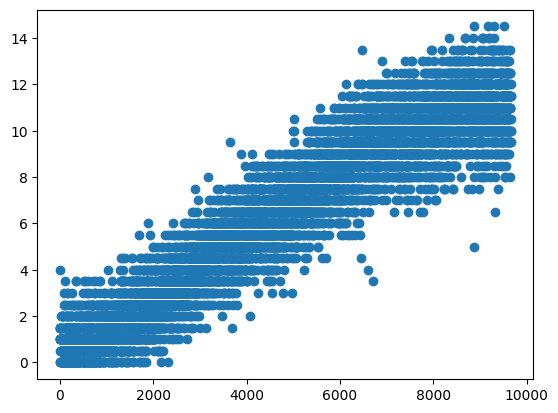

In [178]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)